In [1]:
from matplotlib import pyplot as plt
%run "../GenerateExperiments/res_experiment.py"

In [2]:
plt.rcParams["figure.figsize"] = [5, 5]

In [3]:
def remove_percent_edges(A, p):
    return remove_edges(A, floor(p * np.sum(A != 0)))

def net_stat(statf, topo, params, remove_ps, nnets=25, n=2500):
    mean_stats = []
    for p in remove_ps:
        make_net = lambda : remove_percent_edges(generate_adj(topo, params, n=n), p)
        stats = [statf(make_net()) for i in range(nnets)]
        mean_stat = np.mean(stats)
        mean_stats.append(mean_stat)
    return mean_stats

def plot_stat(statf, mean_degree, title, ylabel, ps=None, n=1000, nnets=20, watts_rewire=.1):
    if ps is None:
        ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
    for topo in ["geom", "erdos", "random_digraph"]:
        stat = net_stat(statf, topo, mean_degree, ps, n=n, nnets=nnets)
        plt.plot(ps, stat, label=topo.capitalize())
    if mean_degree == 1:
        ba = net_stat(statf, "barab1", None, ps, n=n, nnets=nnets)
        plt.plot(ps, ba, label="Barabasi")
    if mean_degree == 2:
        ba = net_stat(statf, "barab2", None, ps, n=n, nnets=nnets)
        ws = net_stat(statf, "watts2", watts_rewire, ps, n=n, nnets=nnets)
        plt.plot(ps, ba, label="Barabasi")
        plt.plot(ps, ws, label="Watts")
    if mean_degree == 4:
        ba = net_stat(statf, "barab4", None, ps, n=n, nnets=nnets)
        ws = net_stat(statf, "watts4", watts_rewire, ps, n=n, nnets=nnets)
        plt.plot(ps, ba, label="Barabasi")
        plt.plot(ps, ws, label="Watts")
    plt.title(title)
    plt.xlabel("Percent of edges removed")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    

Occurences vs size of components

In [31]:
def num_cc_sz(A):
    g = nx.DiGraph(A.T.tolil())
    cc = [list(c) for c in nx.weakly_connected_components(g)]
    cc_sz = np.array([len(c) for c in cc])
    return cc_sz

In [47]:
def remove_percent_edges(A, p):
    return remove_edges(A, floor(p * np.sum(A != 0)))

def new_net_stat(statf, topo, params, remove_ps, nnets=25, n=2500):
    net_stats = []
    size = []
    for p in remove_ps:
        make_net = lambda : remove_percent_edges(generate_adj(topo, params, n=n), p)
        stats = [statf(make_net()) for i in range(nnets)]
        net_stats.append([item for sublist in stats for item in sublist])
        sizes = []
        for s in np.unique(net_stats[-1]):
            sizes.append(np.count_nonzero(net_stats[-1]==s)/nnets)
        size.append(sizes)
    return net_stats, size

(Mean Degree=1)

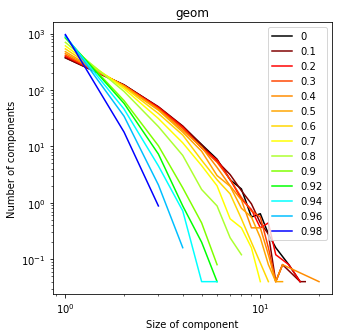

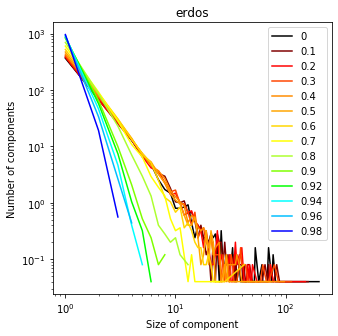

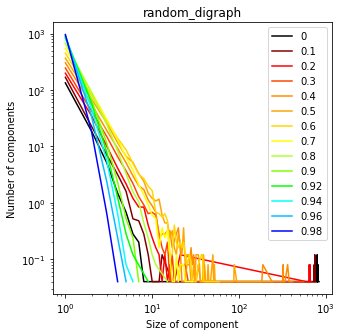

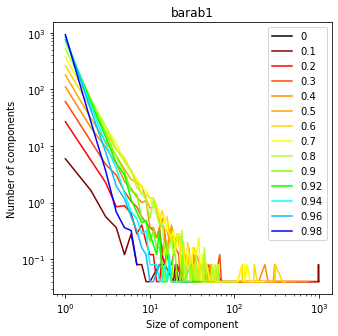

In [48]:
colors = {0:'black', 1:'maroon'
, 2:'red', 3:'orangered'
, 4:'darkorange', 5:'orange'
, 6:'gold', 7:'yellow'
, 8:'greenyellow', 9:'chartreuse'
, 10:'lime', 11:'aqua'
, 12:'deepskyblue', 13:'blue'
, 14:'darkorchid', 15:'purple'
, 16:'magenta'}
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
for topo in ["geom", "erdos", "random_digraph"]:
    stat, size = new_net_stat(num_cc_sz, topo, 1, remove_ps=ps, n=1000, nnets=25)
    for i in range(len(ps)):
        plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
    plt.title(topo)
    plt.xlabel("Size of component")
    plt.ylabel("Number of components")
    plt.legend()
    plt.show()
stat, size = new_net_stat(num_cc_sz, "barab1", None, remove_ps=ps, n=1000, nnets=25)
for i in range(len(ps)):
    plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
plt.title("barab1")
plt.xlabel("Size of component")
plt.ylabel("Number of components")
plt.legend()
plt.show()

(Mean Degree=2)

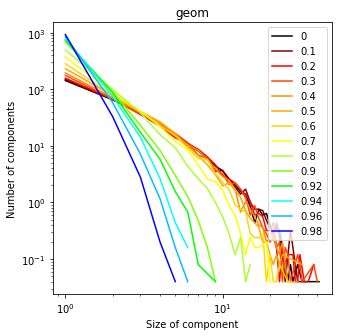

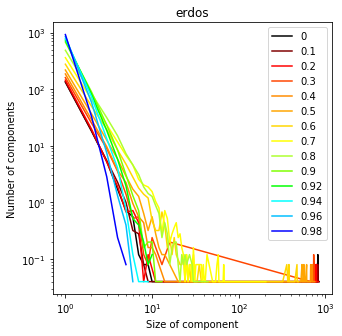

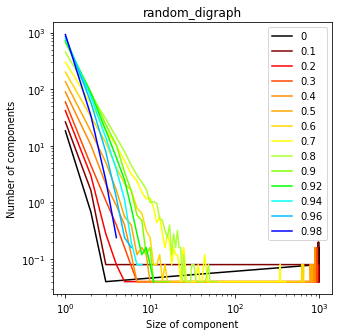

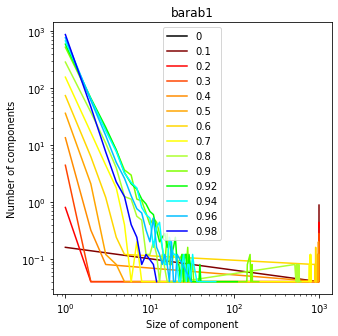

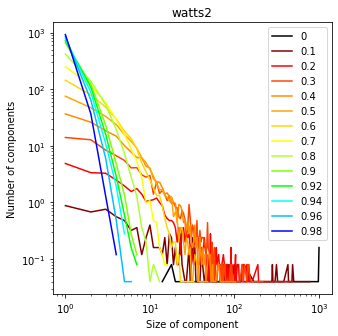

In [49]:
watts_rewire=.1
for topo in ["geom", "erdos", "random_digraph"]:
    stat, size = new_net_stat(num_cc_sz, topo, 2, remove_ps=ps, n=1000, nnets=25)
    for i in range(len(ps)):
        plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
    plt.title(topo)
    plt.xlabel("Size of component")
    plt.ylabel("Number of components")
    plt.legend()
    plt.show()
stat, size = new_net_stat(num_cc_sz, "barab2", None, remove_ps=ps, n=1000, nnets=25)
for i in range(len(ps)):
    plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
plt.title("barab1")
plt.xlabel("Size of component")
plt.ylabel("Number of components")
plt.legend()
plt.show()
stat, size = new_net_stat(num_cc_sz, "watts2", watts_rewire, remove_ps=ps, n=1000, nnets=25)
for i in range(len(ps)):
    plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
plt.title("watts2")
plt.xlabel("Size of component")
plt.ylabel("Number of components")
plt.legend()
plt.show()

(Mean Degree=4)

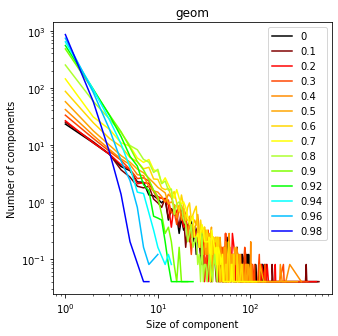

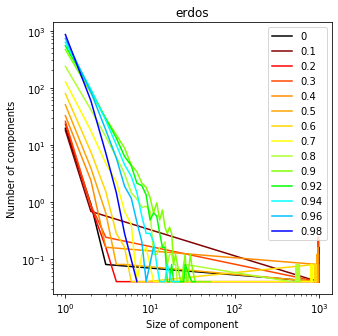

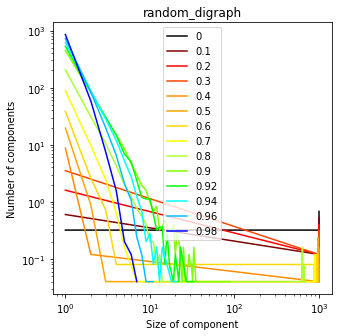

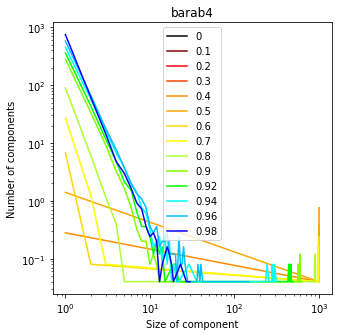

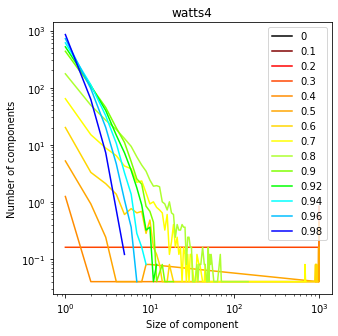

In [50]:
for topo in ["geom", "erdos", "random_digraph"]:
    stat, size = new_net_stat(num_cc_sz, topo, 4, remove_ps=ps, n=1000, nnets=25)
    for i in range(len(ps)):
        plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
    plt.title(topo)
    plt.xlabel("Size of component")
    plt.ylabel("Number of components")
    plt.legend()
    plt.show()
stat, size = new_net_stat(num_cc_sz, "barab4", None, remove_ps=ps, n=1000, nnets=25)
for i in range(len(ps)):
    plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
plt.title("barab4")
plt.xlabel("Size of component")
plt.ylabel("Number of components")
plt.legend()
plt.show()
stat, size = new_net_stat(num_cc_sz, "watts4", watts_rewire, remove_ps=ps, n=1000, nnets=25)
for i in range(len(ps)):
    plt.loglog(np.unique(stat[i]), size[i], label=str(ps[i]),color=colors[i])
plt.title("watts4")
plt.xlabel("Size of component")
plt.ylabel("Number of components")
plt.legend()
plt.show()